<a href="https://colab.research.google.com/github/saurabh-shaw/deep-learning/blob/master/handwriting_digit_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


8


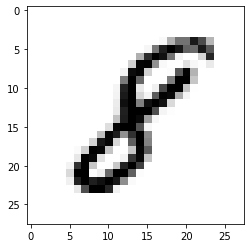

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 7777
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images kkin x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images kkin x_train 60000
Number of images in x_test 10000


In [0]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
# Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





60000/60000 [==============================] - 39s 647us/step - loss: 0.2130 - acc: 0.9362
Epoch 2/10
60000/60000 [==============================] - 37s 618us/step - loss: 0.0904 - acc: 0.9722
Epoch 3/10
60000/60000 [==============================] - 37s 618us/step - loss: 0.0611 - acc: 0.9809
Epoch 4/10
60000/60000 [==============================] - 37s 609us/step - loss: 0.0465 - acc: 0.9852
Epoch 5/10
60000/60000 [==============================] - 37s 618us/step - loss: 0.0386 - acc: 0.9870
Epoch 6/10
60000/60000 [==============================] - 37s 615us/step - loss: 0.0317 - acc: 0.9892
Epoch 7/10
60000/60000 [==============================] - 38s 631us/step - loss: 0.0279 - acc: 0.9905
Epoch 8/10
60000/60000 [==============================] - 38s 628us/step - loss: 0.0246 - acc: 0.9917
Epoch 9/10
60000/60000 [==============================] - 37s 619us/step - loss:

In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 168us/step


[0.052304569710799116, 0.9867]